In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
import warnings
%matplotlib inline

warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv ('train_disaster_training.csv')

In [5]:
# datatype info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21046 entries, 0 to 21045
Data columns (total 42 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   id                      21046 non-null  int64 
 1   split                   21046 non-null  object
 2   message                 21046 non-null  object
 3   original                8191 non-null   object
 4   genre                   21046 non-null  object
 5   related                 21046 non-null  int64 
 6   PII                     21046 non-null  int64 
 7   request                 21046 non-null  int64 
 8   offer                   21046 non-null  int64 
 9   aid_related             21046 non-null  int64 
 10  medical_help            21046 non-null  int64 
 11  medical_products        21046 non-null  int64 
 12  search_and_rescue       21046 non-null  int64 
 13  security                21046 non-null  int64 
 14  military                21046 non-null  int64 
 15  ch

In [6]:
df.head(10)

,id,split,message,original,genre,related,PII,request,offer,aid_related,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
0,2,train,Weather update - a cold front from Cuba that c...,Un front froid se retrouve sur Cuba ce matin. ...,direct,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,train,Is the Hurricane over or is it not over,Cyclone nan fini osinon li pa fini,direct,1,0,0,0,1,...,0,0,1,0,1,0,0,0,0,0
2,12,train,"says: west side of Haiti, rest of the country ...",facade ouest d Haiti et le reste du pays aujou...,direct,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,14,train,Information about the National Palace-,Informtion au nivaux palais nationl,direct,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,15,train,Storm at sacred heart of jesus,Cyclone Coeur sacr de jesus,direct,1,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
5,16,train,"Please, we need tents and water. We are in Sil...",Tanpri nou bezwen tant avek dlo nou zon silo m...,direct,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
6,17,train,"I would like to receive the messages, thank you",Mwen ta renmen jouin messag yo. Merci,direct,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,20,train,"There's nothing to eat and water, we starving ...",Bon repo pa gen anyen menm grangou swaf,direct,1,0,1,0,1,...,0,1,1,1,0,0,0,0,0,1
8,21,train,I am in Petionville. I need more information r...,M nan pv mvle plis enfomasyon sou 4636,direct,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,22,train,"I am in Thomassin number 32, in the area named...",Mwen thomassin 32 nan pyron mwen ta renmen jwe...,direct,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1


Proprocessing the dataset

In [7]:
#remove short words have len < 4
df['message'] = df['message'].apply(lambda x: " ".join([w for w in x.split() if len(w)>3]))
df.head()

,id,split,message,original,genre,related,PII,request,offer,aid_related,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
0,2,train,Weather update cold front from Cuba that could...,Un front froid se retrouve sur Cuba ce matin. ...,direct,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,train,Hurricane over over,Cyclone nan fini osinon li pa fini,direct,1,0,0,0,1,...,0,0,1,0,1,0,0,0,0,0
2,12,train,"says: west side Haiti, rest country today tonight",facade ouest d Haiti et le reste du pays aujou...,direct,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,14,train,Information about National Palace-,Informtion au nivaux palais nationl,direct,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,15,train,Storm sacred heart jesus,Cyclone Coeur sacr de jesus,direct,1,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0


In [8]:
tweet_words = df['message'].apply(lambda x: x.split())
tweet_words.head

<bound method NDFrame.head of 0        [Weather, update, cold, front, from, Cuba, tha...
1                                  [Hurricane, over, over]
2        [says:, west, side, Haiti,, rest, country, tod...
3                  [Information, about, National, Palace-]
4                            [Storm, sacred, heart, jesus]
                               ...                        
21041    [training, demonstrated, enhance, micronutrien...
21042    [suitable, candidate, been, selected, OCHA, Ja...
21043    [Proshika,, operating, Cox's, Bazar, municipal...
21044    [Some, 2,000, women, protesting, against, cond...
21045    [radical, shift, thinking, came, about, result...
Name: message, Length: 21046, dtype: object>

In [9]:
for i in range(len(tweet_words)):
    tweet_words[i] = " ".join(tweet_words[i])

df['message'] = tweet_words
df.head()

,id,split,message,original,genre,related,PII,request,offer,aid_related,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
0,2,train,Weather update cold front from Cuba that could...,Un front froid se retrouve sur Cuba ce matin. ...,direct,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,train,Hurricane over over,Cyclone nan fini osinon li pa fini,direct,1,0,0,0,1,...,0,0,1,0,1,0,0,0,0,0
2,12,train,"says: west side Haiti, rest country today tonight",facade ouest d Haiti et le reste du pays aujou...,direct,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,14,train,Information about National Palace-,Informtion au nivaux palais nationl,direct,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,15,train,Storm sacred heart jesus,Cyclone Coeur sacr de jesus,direct,1,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0


Exploratory Data Analysis

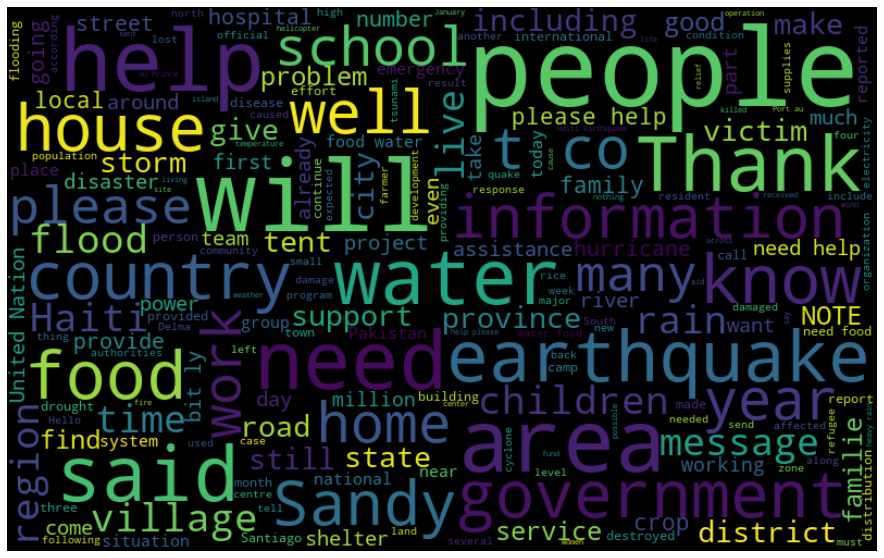

In [10]:
#visualisasi frequensi kata for all tweet
all_words = " ".join([sentence for sentence in df['message']])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

#Plot grafik
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

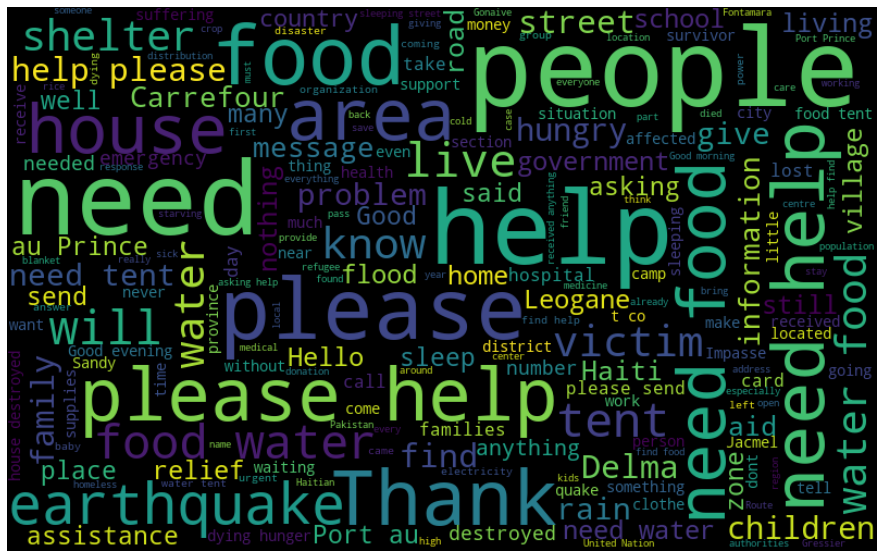

In [11]:
#visualisasi frequensi kata for disaster tweet
all_words = " ".join([sentence for sentence in df['message'][df['request']==1]])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

#Plot grafik
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [12]:
#extract the hashtag
def hashtag_extract(messages):
    hashtags = []
    #Loop words in the tweet
    for message in messages:
        ht = re.findall(r"(\w+)", message)
        hashtags.append(ht)
    return hashtags

In [13]:
#extract hashtag from disaster tweet
ht_disaster = hashtag_extract(df['message'][df['request']==1])

#extract hashtag from non disaster tweet
ht_nondisaster = hashtag_extract(df['message'][df['request']==0])

In [14]:
ht_disaster[:3]

[['Please', 'need', 'tents', 'water', 'Silo', 'Thank', 'you'],
 ['There', 's', 'nothing', 'water', 'starving', 'thirsty'],
 ['Thomassin',
  'number',
  'area',
  'named',
  'Pyron',
  'would',
  'like',
  'have',
  'some',
  'water',
  'Thank',
  'fine',
  'desperately',
  'need',
  'water',
  'Thanks']]

In [15]:
#list the words tweet
ht_disaster = sum(ht_disaster, [])
ht_nondisaster = sum(ht_nondisaster, [])

In [16]:
ht_disaster[:5]

['Please', 'need', 'tents', 'water', 'Silo']

In [17]:
freq = nltk.FreqDist(ht_disaster)
df1 = pd.DataFrame({'Hashtag': (freq.keys()),
                    'Count': (freq.values())})
df1.head()

,Hashtag,Count
0,Please,367
1,need,973
2,tents,204
3,water,690
4,Silo,4


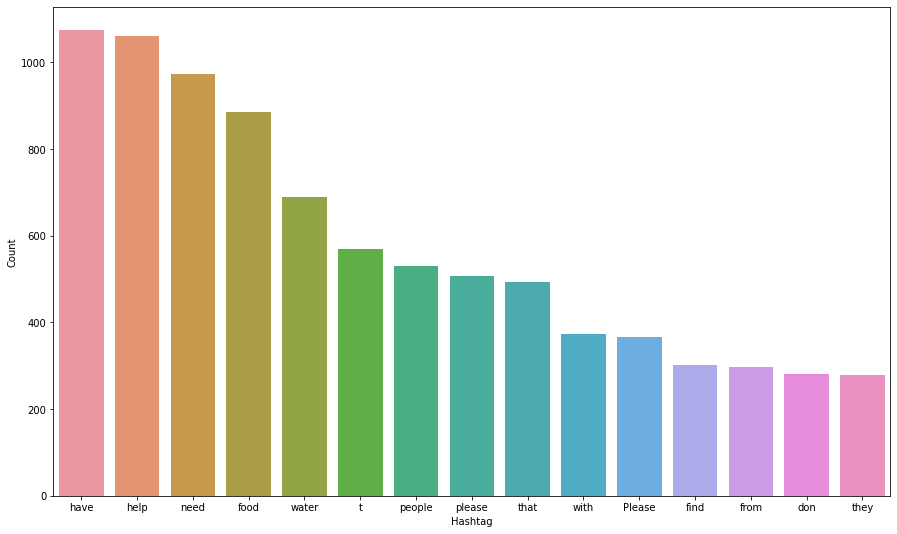

In [18]:
#Select top 15 hashtag disaster
df1 = df1.nlargest(columns='Count', n=15)
plt.figure(figsize=(15,9))
sns.barplot(data=df1, x='Hashtag', y='Count')
plt.show()

In [19]:
freq = nltk.FreqDist(ht_nondisaster)
df1 = pd.DataFrame({'Hashtag': (freq.keys()),
                    'Count': (freq.values())})
df1.head()

,Hashtag,Count
0,Weather,21
1,update,23
2,cold,120
3,front,46
4,from,1878


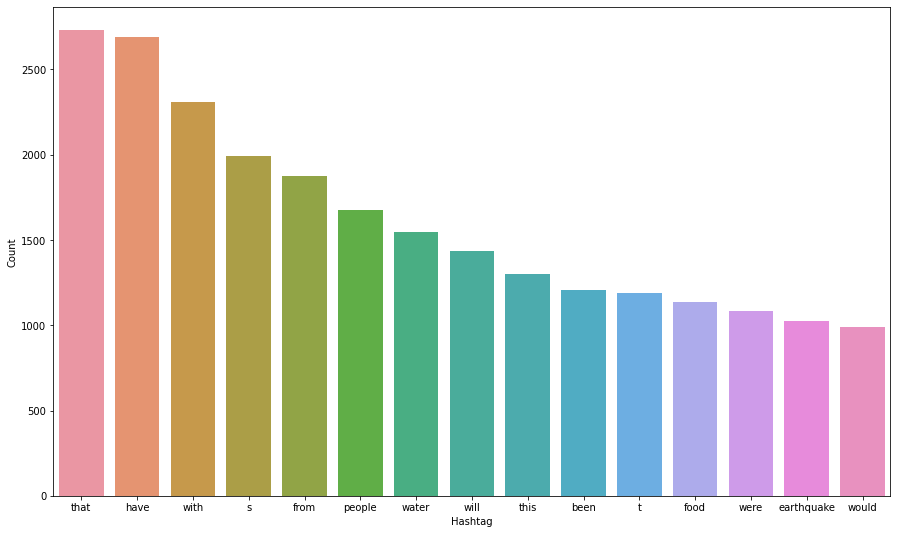

In [20]:
#Select top 15 hashtag non disaster
df1 = df1.nlargest(columns='Count', n=15)
plt.figure(figsize=(15,9))
sns.barplot(data=df1, x='Hashtag', y='Count')
plt.show()

Input Split

In [21]:
#feature extracion
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow = bow_vectorizer.fit_transform(df['message'])

In [22]:
#bow[0].toarray()

In [23]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(bow, df['request'], random_state=42, test_size=0.25)

Model Training

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score

In [25]:
# training
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [26]:
# testing
prediction = model.predict(x_test)
f1_score(y_test, prediction)

0.5895470383275261

In [27]:
accuracy_score(y_test, prediction)

0.8880653743823641

In [28]:
prediction_probability = model.predict_proba(x_test)
prediction = prediction_probability[:, 1] >= 0.3
prediction = prediction.astype(np.int)

f1_score(y_test, prediction)

0.6175637393767707

In [29]:
accuracy_score(y_test, prediction)

0.8717217787913341

In [30]:
prediction_probability[0][1] >= 0.3

False